In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:

import tensorflow as tf
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [22]:
filename = '/content/drive/MyDrive/Practical Materials - Lab 5/meat.txt'

data = pd.read_csv(filename, sep=',')
data

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
822,2012-07-01,2200.8,9.5,1721.8,12.5,3127.0,43.4,497.2
823,2012-08-01,2367.5,10.1,1997.9,14.2,3317.4,51.0,530.1
824,2012-09-01,2016.0,8.8,1911.0,12.5,2927.1,43.7,453.1
825,2012-10-01,2343.7,10.3,2210.4,14.2,3335.0,43.8,579.9


In [23]:
data = data.drop(columns = ['date'])
data

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,681.0,106.0,1029.0,78.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
822,2200.8,9.5,1721.8,12.5,3127.0,43.4,497.2
823,2367.5,10.1,1997.9,14.2,3317.4,51.0,530.1
824,2016.0,8.8,1911.0,12.5,2927.1,43.7,453.1
825,2343.7,10.3,2210.4,14.2,3335.0,43.8,579.9


In [24]:
data_cleaned = data.dropna()
data_cleaned

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
684,2205.0,18.0,1693.0,19.0,2622.2,42.7,461.2
685,1881.0,16.0,1486.0,17.0,2322.2,39.7,409.3
686,2096.0,16.0,1626.0,23.0,2588.6,44.4,462.0
687,1939.0,15.0,1533.0,20.0,2515.7,42.2,428.8
688,2294.0,16.0,1555.0,17.0,2835.6,45.6,488.3
...,...,...,...,...,...,...,...
822,2200.8,9.5,1721.8,12.5,3127.0,43.4,497.2
823,2367.5,10.1,1997.9,14.2,3317.4,51.0,530.1
824,2016.0,8.8,1911.0,12.5,2927.1,43.7,453.1
825,2343.7,10.3,2210.4,14.2,3335.0,43.8,579.9


In [25]:
scaler = MinMaxScaler()
data['beef'] = scaler.fit_transform(data['beef'].values.reshape(-1,1))
data['beef']

0      0.179404
1      0.161696
2      0.174744
3      0.132339
4      0.146785
         ...   
822    0.854986
823    0.932665
824    0.768872
825    0.921575
826    0.857689
Name: beef, Length: 827, dtype: float64

In [26]:
def create_sequence(data, window_size=10):

  X = []

  y = []

  for i in range(len(data)-window_size):
    X.append(data[i: i + window_size])
    y.append(data[i+window_size])

  return np.array(X), np.array(y)


In [27]:
WINDOW_SIZE = 10
X, y = create_sequence(data['beef'], WINDOW_SIZE)
X.shape, y.shape


((817, 10), (817,))

In [28]:
#SPLIT DATA INTO TRAIN AND TEST

X_train1, y_train1 = X[:600], y[:600]  #1st 600 rows
X_test1, y_test1 = X[600:], y[600:]

X_train1.shape, y_train1.shape,X_test1.shape, y_test1.shape


((600, 10), (600,), (217, 10), (217,))

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam



# model1.summary()

model1 = Sequential()
model1.add(LSTM(50, activation='relu',input_shape=(WINDOW_SIZE,1)))
model1.add(Dense(1))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                10400     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model1.compile(optimizer='adam',loss='mean_squared_error')

In [38]:
model1.fit(X_train1, y_train1, epochs=50, batch_size=8)

Epoch 1/50
75/75 [==============================] - 1s 11ms/step - loss: 0.0030
Epoch 2/50
75/75 [==============================] - 1s 7ms/step - loss: 0.0026
Epoch 3/50
75/75 [==============================] - 1s 7ms/step - loss: 0.0028
Epoch 4/50
75/75 [==============================] - 1s 8ms/step - loss: 0.0025
Epoch 5/50
75/75 [==============================] - 1s 8ms/step - loss: 0.0025
Epoch 6/50
75/75 [==============================] - 1s 8ms/step - loss: 0.0025
Epoch 7/50
75/75 [==============================] - 1s 8ms/step - loss: 0.0025
Epoch 8/50
75/75 [==============================] - 1s 8ms/step - loss: 0.0025
Epoch 9/50
75/75 [==============================] - 1s 9ms/step - loss: 0.0028
Epoch 10/50
75/75 [==============================] - 1s 8ms/step - loss: 0.0025
Epoch 11/50
75/75 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 12/50
75/75 [==============================] - 1s 7ms/step - loss: 0.0024
Epoch 13/50
75/75 [=============================

In [39]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

19/19 [==============================] - 0s 3ms/step


,Train Predictions,Actuals
0,0.196318,0.195713
1,0.202946,0.185461
2,0.203438,0.211556
3,0.204774,0.209692
4,0.207396,0.219012
...,...,...
595,0.741369,0.834110
596,0.762853,0.773998
597,0.766439,0.861603
598,0.775667,0.824324


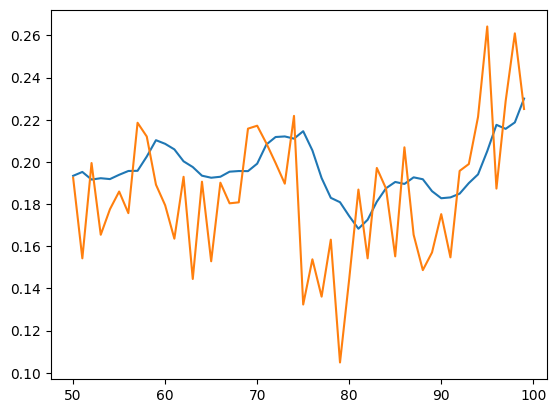

In [40]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [41]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

7/7 [==============================] - 0s 6ms/step


,Test Predictions,Actuals
0,0.786281,0.751165
1,0.778888,0.770736
2,0.767923,0.766076
3,0.774326,0.673346
4,0.763501,0.792637
...,...,...
212,0.847159,0.854986
213,0.844997,0.932665
214,0.851772,0.768872
215,0.840728,0.921575


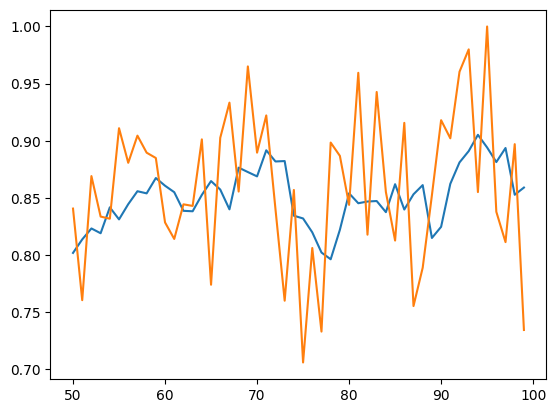

In [42]:
plt.plot(test_results['Test Predictions'][50:100])
plt.plot(test_results['Actuals'][50:100])